In [1]:
from SVDModel import SVDModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(3362)
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
# MovieLens Small
data_path_ml_small = './data/ml-latest-small/'
df_rating_ml_small = pd.read_csv(data_path_ml_small+'ratings.csv')
df_movies_ml_small = pd.read_csv(data_path_ml_small+'movies.csv')
m_movies_ml_small = df_movies_ml_small['movieId'].nunique()
n_users_ml_small = df_rating_ml_small['userId'].nunique()
n_ratings_ml_small = len(df_rating_ml_small)

df_movies_ml_small.insert(1, 'newMovieId', value=range(1,len(df_movies_ml_small)+1))
newMovieIdDict = {}
for index, movie in df_movies_ml_small.iterrows():
  newMovieIdDict[movie['movieId']] = movie['newMovieId']
df_rating_ml_small.replace({"movieId": newMovieIdDict}, inplace=True)
df_rating_ml_small['rating'] = df_rating_ml_small['rating'].astype(np.int64)

# print(df_rating_ml_small)
# print(df_movies_ml_small)
# print(n_users_ml_small)
# print(n_ratings_ml_small)
# print(m_movies_ml_small)

In [3]:
# Netflix Prize
data_path_netflix = './data/NetflixPrize/'
names = ['userId','rating','timestamp','movieId']
df_netflix = pd.read_csv(data_path_netflix+'data_1.txt', names=names, low_memory=False)
# df_netflix_2 = pd.read_csv(data_path_netflix+'data_2.txt', names=names, low_memory=False)
# df_netflix_3 = pd.read_csv(data_path_netflix+'data_3.txt', names=names, low_memory=False)
# df_netflix_4 = pd.read_csv(data_path_netflix+'data_4.txt', names=names, low_memory=False)
# df_netflix = pd.concat([df_netflix,df_netflix_2,df_netflix_3,df_netflix_4], names=names)
df_netflix['movieId'] = df_netflix['movieId'].fillna(method='ffill')
df_netflix = df_netflix.dropna()
df_netflix['rating'] = df_netflix['rating'].astype(np.int64)
df_netflix['movieId'] = df_netflix['movieId'].astype(np.int64)
df_netflix['userId'] = df_netflix['userId'].astype(np.int64)
df_netflix['timestamp'] = pd.to_datetime(df_netflix['timestamp']).view(dtype=np.int64) // 10 ** 9
# df_movies_netflix = pd.read_csv(data_path_netflix+'movie_titles.csv',encoding='latin-1',names=['movieId','release_year','title',])
m_movies_netflix = df_netflix['movieId'].nunique()
# m_movies_netflix = df_netflix['movieId'].max()
n_users_netflix = df_netflix['userId'].nunique()
# n_users_netflix = df_netflix['userId'].max()
n_ratings_netflix = len(df_netflix)
df_rating_netflix = df_netflix[['userId','movieId','rating','timestamp']].sample(10000)


# print(df_netflix_rating)
# print(df_netflix_movies)
# print(n_users_netflix)
# print(n_ratings_netflix)
# print(m_movies_netflix)

In [4]:
features = 3
lr = 0.001
epochs = 101
weight_decay = 0.02
stopping = 0.001

svd_ml_small = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)
svd_netflix = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)


In [5]:
svd_ml_small.data_loader(data=df_rating_ml_small, n_items = m_movies_ml_small, n_users=n_users_ml_small)
svd_ml_small.split(0.6,0.8)

User Item Matrix Shape: (610, 9742)
User Reference length: 610
Item Reference length: 9742


In [6]:
svd_netflix.data_loader(data=df_rating_netflix, n_items = m_movies_netflix, n_users=n_users_netflix)
svd_netflix.split(0.6,0.8)

User Item Matrix Shape: (9667, 4499)
User Reference length: 9667
Item Reference length: 4499


In [7]:
results_ml_small = svd_ml_small.training()

Epoch :    1  | Train : 12.505  | Valid : 12.479  | Time :   6s
Epoch :   11  | Train : 7.248  | Valid : 7.571  | Time :  56s
Epoch :   21  | Train : 3.113  | Valid : 3.670  | Time :  57s
Epoch :   31  | Train : 1.936  | Valid : 2.574  | Time :  57s
Epoch :   41  | Train : 1.436  | Valid : 2.116  | Time :  57s
Epoch :   51  | Train : 1.168  | Valid : 1.872  | Time :  62s
Epoch :   61  | Train : 1.004  | Valid : 1.724  | Time :  59s
Epoch :   71  | Train : 0.896  | Valid : 1.627  | Time :  58s
Epoch :   81  | Train : 0.820  | Valid : 1.558  | Time :  58s
Epoch :   91  | Train : 0.765  | Valid : 1.509  | Time :  61s
Epoch :  101  | Train : 0.724  | Valid : 1.473  | Time :  58s
Training stopped:
Epoch :  101  | Train : 0.724  | Valid : 1.473


In [8]:
resuls_netflix = svd_netflix.training()

Epoch :    1  | Train : 14.019  | Valid : 14.352  | Time :  35s
Epoch :   11  | Train : 13.988  | Valid : 14.329  | Time : 467s
Epoch :   21  | Train : 13.949  | Valid : 14.304  | Time : 441s
Epoch :   31  | Train : 13.898  | Valid : 14.276  | Time : 448s
Epoch :   41  | Train : 13.827  | Valid : 14.245  | Time : 479s
Epoch :   51  | Train : 13.729  | Valid : 14.209  | Time : 458s
Epoch :   61  | Train : 13.590  | Valid : 14.168  | Time : 424s
Epoch :   71  | Train : 13.398  | Valid : 14.120  | Time : 435s
Epoch :   81  | Train : 13.138  | Valid : 14.066  | Time : 415s
Epoch :   91  | Train : 12.800  | Valid : 14.004  | Time : 408s
Epoch :  101  | Train : 12.383  | Valid : 13.934  | Time : 410s
Training stopped:
Epoch :  101  | Train : 12.383  | Valid : 13.934


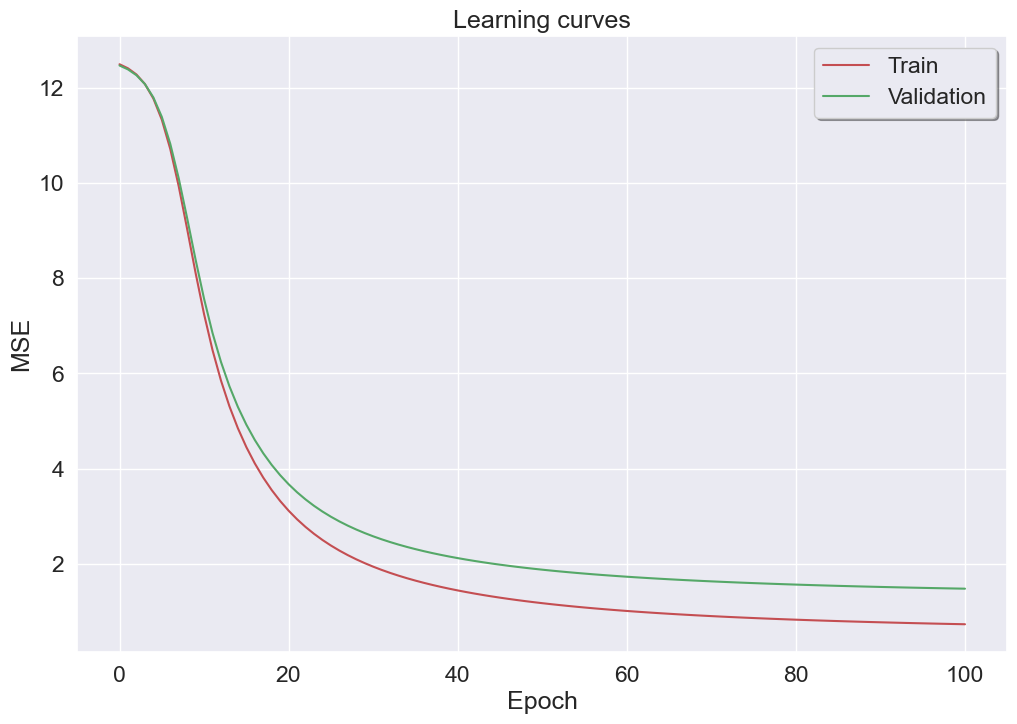

In [9]:
x = list(range(len(results_ml_small[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], results_ml_small[0][-k:], 'r', label="Train")
plt.plot(x[-k:], results_ml_small[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

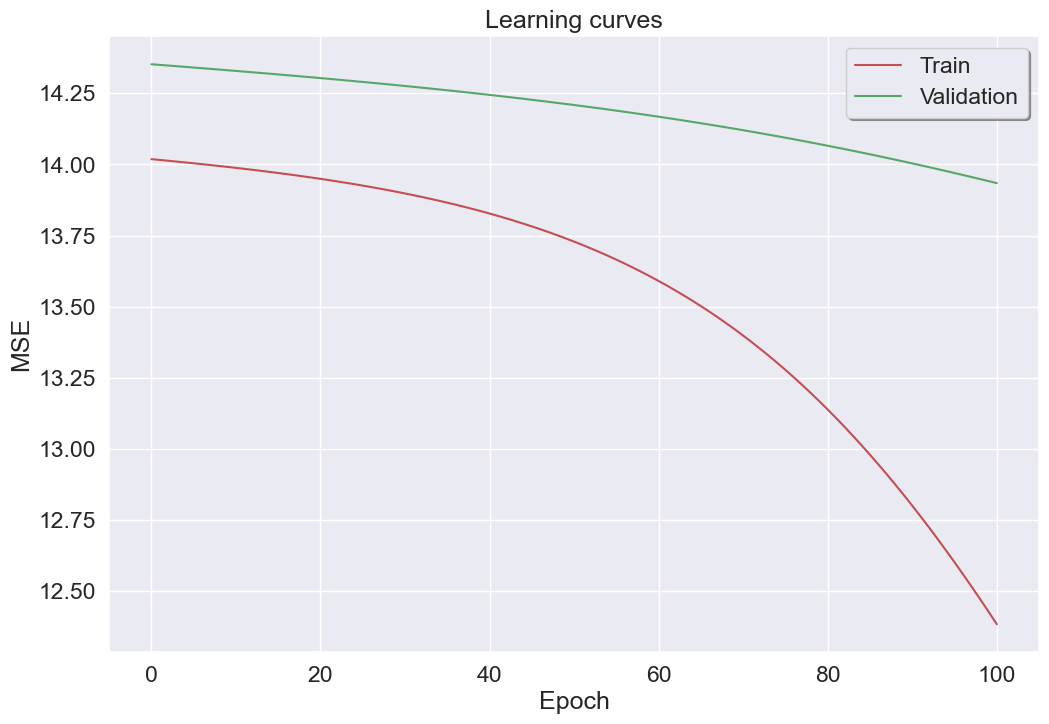

In [10]:
x = list(range(len(resuls_netflix[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], resuls_netflix[0][-k:], 'r', label="Train")
plt.plot(x[-k:], resuls_netflix[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

In [11]:
svd_ml_small.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100836 non-null  int64
 1   movieId    100836 non-null  int64
 2   rating     100836 non-null  int64
 3   timestamp  100836 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [12]:
svd_netflix.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3910340 to 20649332
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userId     10000 non-null  int64
 1   movieId    10000 non-null  int64
 2   rating     10000 non-null  int64
 3   timestamp  10000 non-null  int64
dtypes: int64(4)
memory usage: 390.6 KB


In [23]:
import pickle
from pathlib import Path
Path("./demo").mkdir(parents=True, exist_ok=True)

with open('./demo/svd_ml_small.pkl', 'wb') as out:
    pickle.dump(svd_ml_small, out, pickle.HIGHEST_PROTOCOL)
with open('./demo/svd_netflix.pkl', 'wb') as out:
    pickle.dump(svd_netflix, out, pickle.HIGHEST_PROTOCOL)

In [24]:
with open('./demo/svd_ml_small.pkl', 'rb') as inp:
    loaded_svd = pickle.load(inp)

In [26]:
loaded_svd._P

array([[2.08666258, 2.08521142, 2.24749077],
       [1.58172551, 1.48532982, 1.48723735],
       [1.14109943, 1.00026413, 1.16511587],
       ...,
       [1.63570523, 1.48647032, 1.60303832],
       [1.39812965, 1.43032008, 1.30571363],
       [1.69886363, 1.92206422, 2.02534139]])

In [27]:
svd_ml_small._P

array([[2.08666258, 2.08521142, 2.24749077],
       [1.58172551, 1.48532982, 1.48723735],
       [1.14109943, 1.00026413, 1.16511587],
       ...,
       [1.63570523, 1.48647032, 1.60303832],
       [1.39812965, 1.43032008, 1.30571363],
       [1.69886363, 1.92206422, 2.02534139]])